## Importar librerias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
import warnings  #Remove unnecessary warnings
warnings.filterwarnings('ignore')

## Cargar data

In [3]:
df = pd.read_csv('archive (1)/Credit Card Customer Data.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [5]:
df.describe().style.background_gradient(cmap='Oranges')

In [6]:
df.isnull().sum()


Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [7]:
df.duplicated().any()

False

## Analisis

Eliminado una columna index 

In [8]:
df.drop(columns='Sl_No',axis=1,inplace=True)

### Analisis de todos los datos

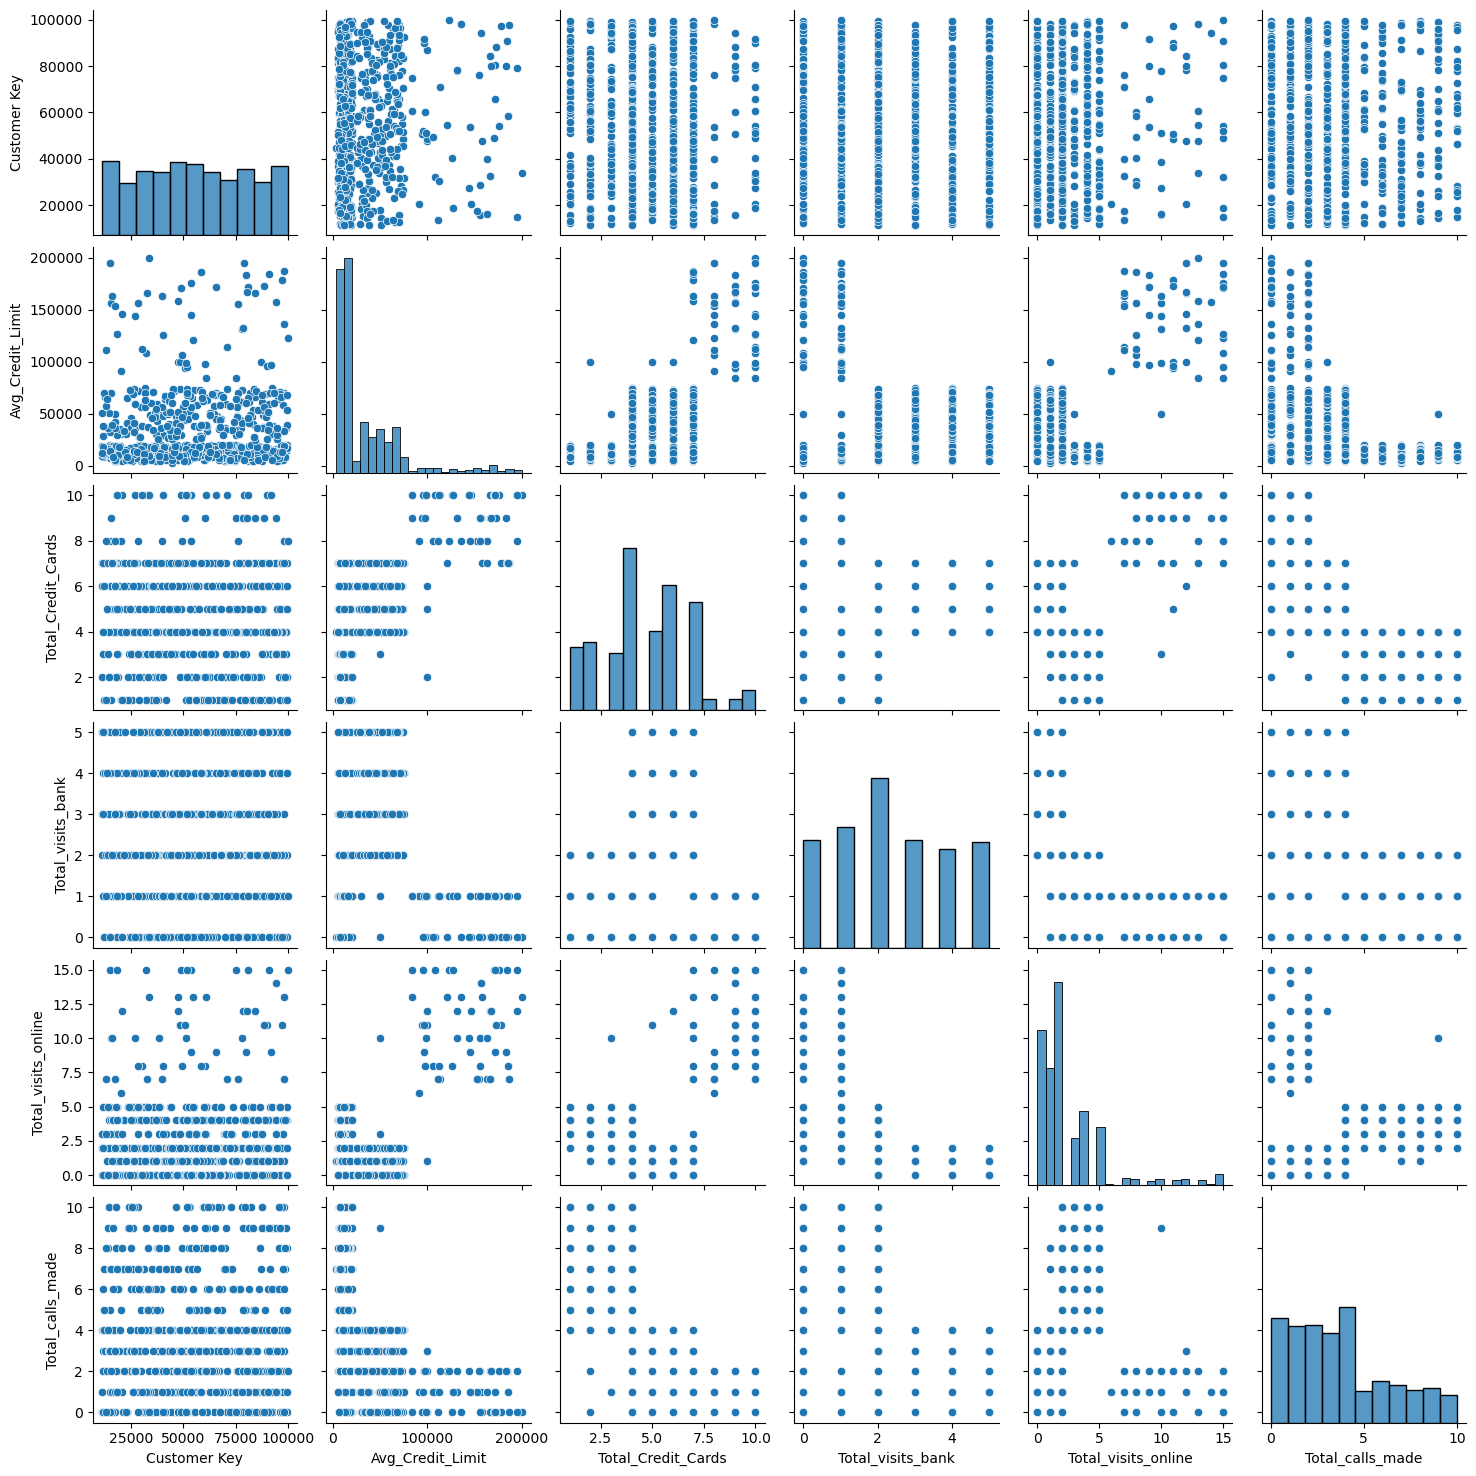

In [9]:
sns.pairplot(df)

### agregando nuevas variables 

Esta nueva columna nos explica la cantidad de credito usado por cliente entre la cantidad de productos 

In [10]:
df['Credit_Utilization_Ratio'] = df['Avg_Credit_Limit'] / df['Total_Credit_Cards']

Esta columna nos ayuda a saber la cantidad de contacto que tuvo el cliente con el banco

In [11]:
df['Interaction_Score'] = df['Total_visits_bank'] + df['Total_visits_online'] + df['Total_calls_made']

In [12]:
df.head()

Customer Key  Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0         87073            100000                   2                  1   
1         38414             50000                   3                  0   
2         17341             50000                   7                  1   
3         40496             30000                   5                  1   
4         47437            100000                   6                  0   

   Total_visits_online  Total_calls_made  Credit_Utilization_Ratio  \
0                    1                 0              50000.000000   
1                   10                 9              16666.666667   
2                    3                 4               7142.857143   
3                    1                 4               6000.000000   
4                   12                 3              16666.666667   

   Interaction_Score  
0                  2  
1                 19  
2                  8  
3                  6  
4                 15

### Buscando correlacion entre las variables 

<Axes: >

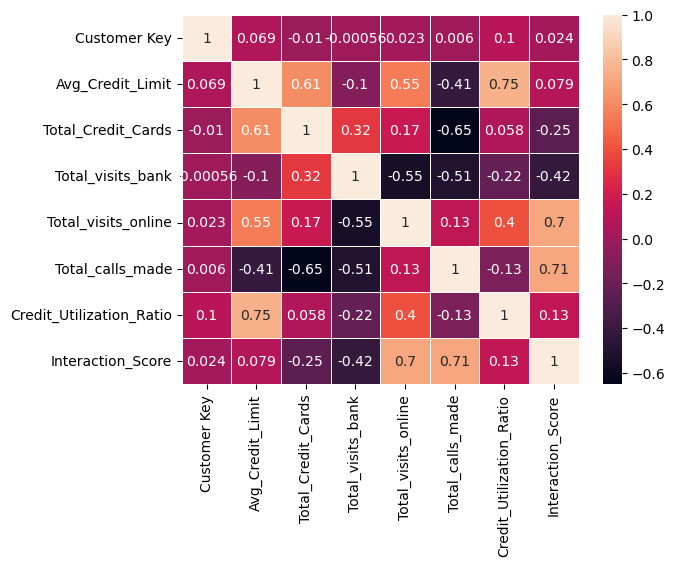

In [13]:
sns.heatmap(
    data= df.corr(),
    annot= True,
    # cmap='coolwarn',
    linewidths=0.5
    )

## Outliners

In [14]:
df.head()

Customer Key  Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0         87073            100000                   2                  1   
1         38414             50000                   3                  0   
2         17341             50000                   7                  1   
3         40496             30000                   5                  1   
4         47437            100000                   6                  0   

   Total_visits_online  Total_calls_made  Credit_Utilization_Ratio  \
0                    1                 0              50000.000000   
1                   10                 9              16666.666667   
2                    3                 4               7142.857143   
3                    1                 4               6000.000000   
4                   12                 3              16666.666667   

   Interaction_Score  
0                  2  
1                 19  
2                  8  
3                  6  
4                 15

<Axes: xlabel='Avg_Credit_Limit'>

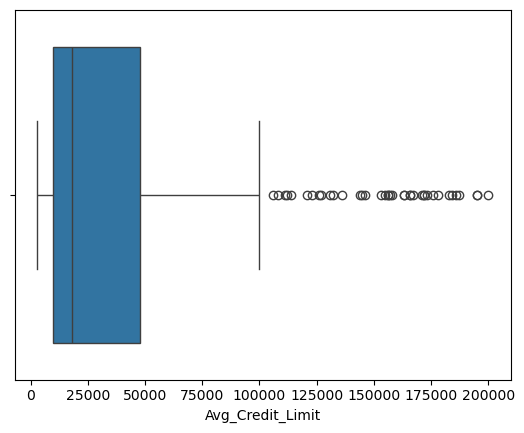

In [15]:
sns.boxplot(
    data= df,
    x= 'Avg_Credit_Limit'
)

<Axes: xlabel='Total_Credit_Cards'>

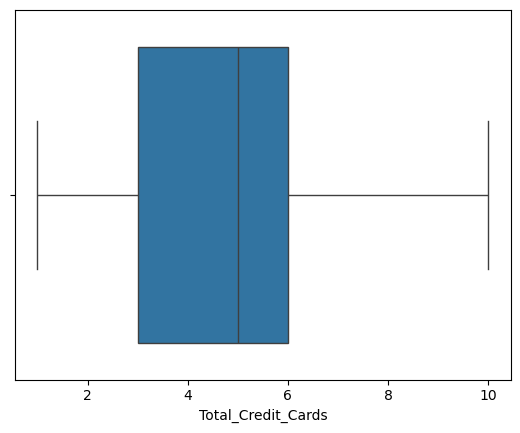

In [16]:
sns.boxplot(
    data= df,
    x= 'Total_Credit_Cards'
)

<Axes: xlabel='Total_visits_online'>

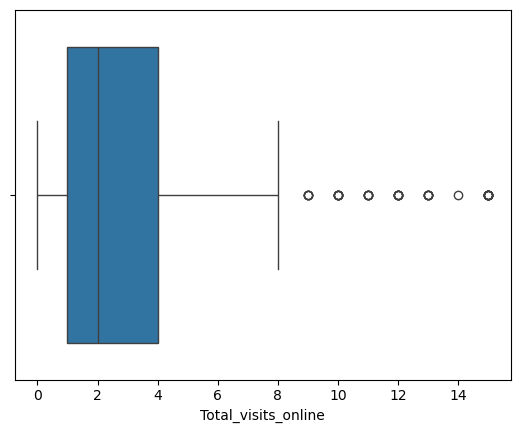

In [17]:
sns.boxplot(
    data= df,
    x= 'Total_visits_online'
)

<Axes: xlabel='Total_calls_made'>

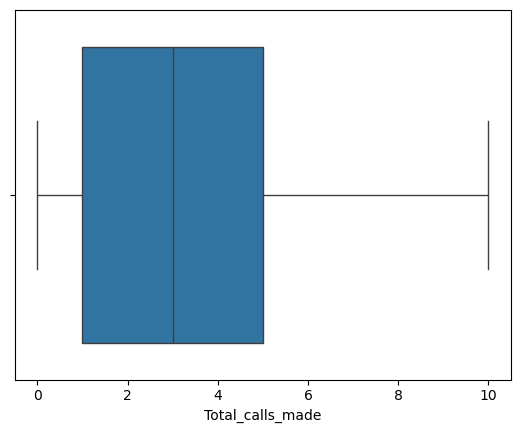

In [18]:
sns.boxplot(
    data= df,
    x= 'Total_calls_made'
)

<Axes: xlabel='Total_visits_bank'>

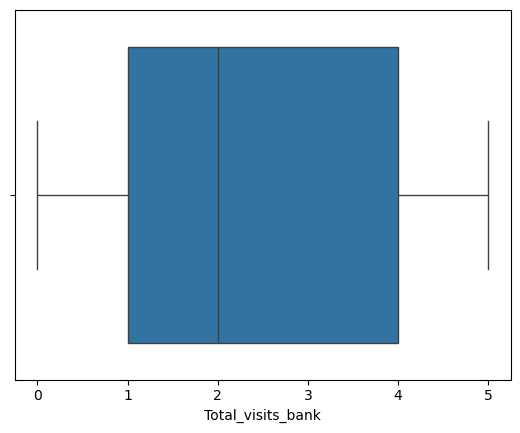

In [19]:
	
sns.boxplot(
    data= df,
    x= 'Total_visits_bank'
)

Validando los outlier vamos que tenemos 2 columnas con una gran cantidad de los mismos que son: Total_visits_online, Avg_Credit_Limit 

In [20]:
def handle_outliers(data, column_name, action='remove'):
    """
    Identifica y maneja los outliers en una columna de un DataFrame usando el IQR.

    Parámetros:
    - data (pd.DataFrame): DataFrame que contiene los datos.
    - column_name (str): Nombre de la columna en la que se buscarán outliers.
    - action (str): Acción a realizar con los outliers. Puede ser 'remove' para eliminarlos o 'cap' para limitarlos al IQR.

    Retorna:
    - pd.DataFrame: DataFrame con outliers manejados según la acción especificada.
    """
    # Calcular el IQR
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # Definir límites inferior y superior
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    if action == 'remove':
        # Eliminar outliers
        data = data[(data[column_name] >= lower_bound) & (data[column_name] <= upper_bound)]
    elif action == 'cap':
        # Limitar valores atípicos al IQR
        data[column_name] = data[column_name].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))
    else:
        print("Acción no reconocida. Por favor usa 'remove' o 'cap'.")

    return data



In [21]:
df = handle_outliers(df, 'Total_visits_online')
df = handle_outliers(df, 'Avg_Credit_Limit')

Hemos optenido un df reducido eliminado los valores atipicos 

In [22]:
df

Customer Key  Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
2           17341             50000                   7                  1   
3           40496             30000                   5                  1   
5           58634             20000                   3                  0   
7           37376             15000                   3                  0   
8           82490              5000                   2                  0   
..            ...               ...                 ...                ...   
607         90191             34000                   6                  3   
608         49341             47000                   4                  4   
609         11562             38000                   4                  3   
610         16253             39000                   7                  2   
611         80623             46000                   7                  4   

     Total_visits_online  Total_calls_made  Credit_Utilization_Ratio  \
2                      3                 4               7142.857143   
3                      1                 4               6000.000000   
5                      1                 8               6666.666667   
7                      1                 1               5000.000000   
8                      2                 2               2500.000000   
..                   ...               ...                       ...   
607                    1                 0               5666.666667   
608                    1                 0              11750.000000   
609                    2                 0               9500.000000   
610                    1                 0               5571.428571   
611                    1                 3               6571.428571   

     Interaction_Score  
2                    8  
3                    6  
5                    9  
7                    2  
8                    4  
..                 ...  
607                  4  
608                  5  
609                  5  
610                  3  
611                  8  

[608 rows x 8 columns]

<Axes: xlabel='Total_visits_online'>

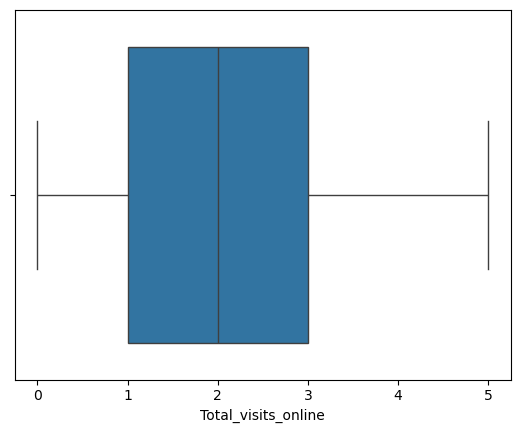

In [23]:
sns.boxplot(
    data= df,
    x= 'Total_visits_online'
)

<Axes: xlabel='Avg_Credit_Limit'>

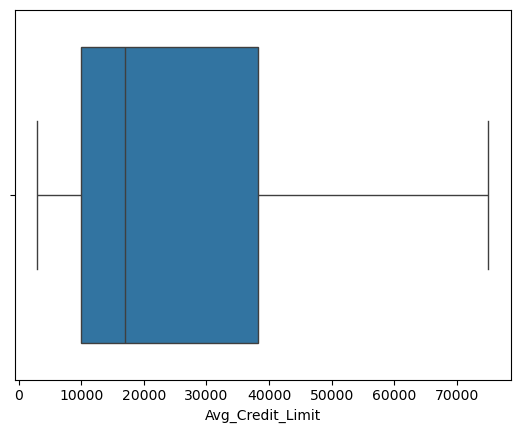

In [24]:
sns.boxplot(
    data= df,
    x= 'Avg_Credit_Limit'
)

### Modelo K-means

In [25]:
df

Customer Key  Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
2           17341             50000                   7                  1   
3           40496             30000                   5                  1   
5           58634             20000                   3                  0   
7           37376             15000                   3                  0   
8           82490              5000                   2                  0   
..            ...               ...                 ...                ...   
607         90191             34000                   6                  3   
608         49341             47000                   4                  4   
609         11562             38000                   4                  3   
610         16253             39000                   7                  2   
611         80623             46000                   7                  4   

     Total_visits_online  Total_calls_made  Credit_Utilization_Ratio  \
2                      3                 4               7142.857143   
3                      1                 4               6000.000000   
5                      1                 8               6666.666667   
7                      1                 1               5000.000000   
8                      2                 2               2500.000000   
..                   ...               ...                       ...   
607                    1                 0               5666.666667   
608                    1                 0              11750.000000   
609                    2                 0               9500.000000   
610                    1                 0               5571.428571   
611                    1                 3               6571.428571   

     Interaction_Score  
2                    8  
3                    6  
5                    9  
7                    2  
8                    4  
..                 ...  
607                  4  
608                  5  
609                  5  
610                  3  
611                  8  

[608 rows x 8 columns]

In [26]:
from sklearn.preprocessing import StandardScaler

Filtrando las columnas que vamos a utilizar para el modelo

In [27]:
scaler = StandardScaler()
df_scaler = scaler.fit_transform(df)

In [28]:
df_scaler

array([[-1.47507827,  1.18619745,  1.39912055, ...,  0.07461831,
         0.18208229, -0.08088651],
       [-0.56781211,  0.21047121,  0.33044556, ...,  0.07461831,
        -0.07868755, -0.70737053],
       [ 0.14287645, -0.27739191, -0.73822944, ...,  1.47055467,
         0.07342819,  0.2323555 ],
       ...,
       [-1.70151278,  0.60076171, -0.20389194, ..., -1.32131806,
         0.7199201 , -1.02061254],
       [-1.51770861,  0.64954802,  1.39912055, ..., -1.32131806,
        -0.17647624, -1.64709656],
       [ 1.00445605,  0.9910522 ,  1.39912055, ..., -0.27436578,
         0.05169737, -0.08088651]])

## PCA para clustering

In [29]:
from sklearn.decomposition import PCA

In [30]:
pca = PCA()

In [31]:
pca.fit(df_scaler)
pca_data_scaler = pca.transform(df_scaler)
pca_data_scaler

array([[-2.67337425e-01,  3.57598014e-01,  1.59889208e+00, ...,
        -6.59604503e-01,  1.25609544e-01, -3.95068060e-16],
       [-3.63448166e-01, -6.26496180e-02,  6.24418634e-01, ...,
         4.74225390e-01,  1.39685244e-02,  1.62335027e-17],
       [ 1.50617350e+00,  3.46210568e-01, -4.46788234e-02, ...,
         1.46181349e+00, -6.92333731e-02,  2.49580061e-16],
       ...,
       [-1.24308947e+00,  4.08690192e-01,  1.88622264e+00, ...,
        -8.54130615e-01, -1.08003914e-01, -2.83403689e-16],
       [-2.21846388e+00, -5.08432245e-01,  1.53068814e+00, ...,
        -5.05756954e-01,  1.57864245e-01,  4.09909854e-17],
       [-1.64148827e+00,  3.77863940e-01, -9.96094399e-01, ...,
         8.66909035e-02,  7.07774336e-02, -1.79962349e-16]])

In [32]:
var = pca.explained_variance_ratio_
var

array([4.82110509e-01, 2.01608421e-01, 1.21585276e-01, 8.63831265e-02,
       5.54578746e-02, 4.43631912e-02, 8.49160135e-03, 1.51936546e-32])

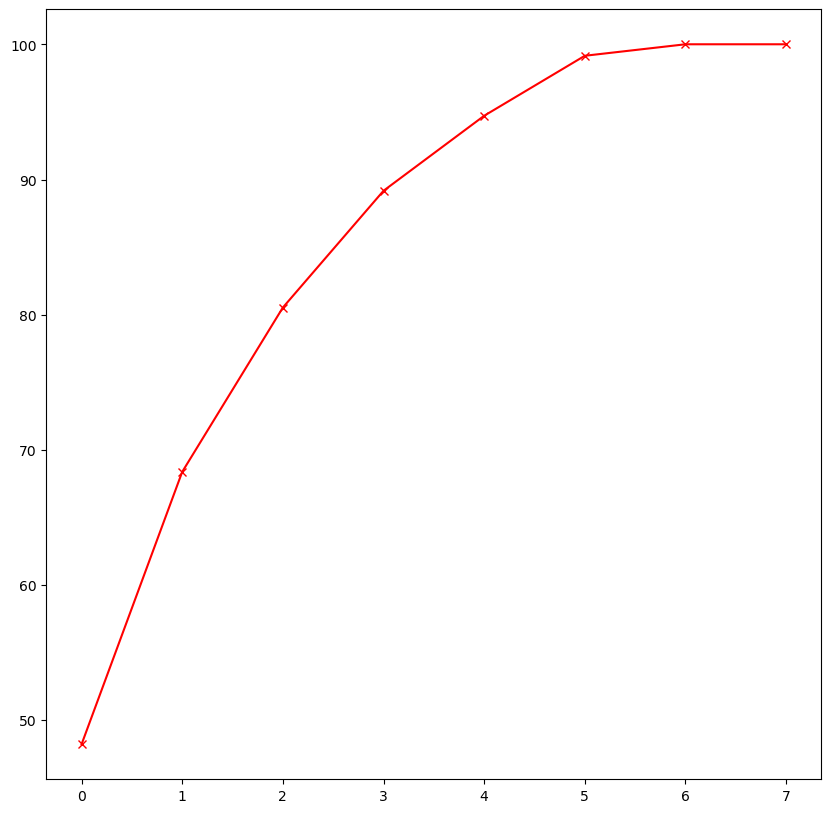

In [33]:
cum_var = np.cumsum(np.round(var,decimals=4)*100)
plt.figure(figsize=(10,10))
plt.plot(cum_var,'r-x')
plt.show()

Lo que hemos optenido con esta reduccion de dimencionalidad es Mediante el PCA reducir a las columnas que aportan mas valor a nuestro modelo y solo tomar eso fetures

In [34]:
pca_df_scaler = pd.DataFrame(data= pca_data_scaler)
pca_df_scaler.drop([4,5,6,7],axis= 1,inplace=True)

### Aplicando el modelo

In [35]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score 
from scipy.cluster.hierarchy import dendrogram, linkage

In [36]:
Sum_of_squared_distances = []
silhouette_scores = []
K = range(2,15)
for _ in K:
    km = KMeans(n_clusters = _)
    y = km.fit_predict(pca_df_scaler)
    Sum_of_squared_distances.append(km.inertia_)
    silhouette_scores.append(silhouette_score(pca_df_scaler,y))

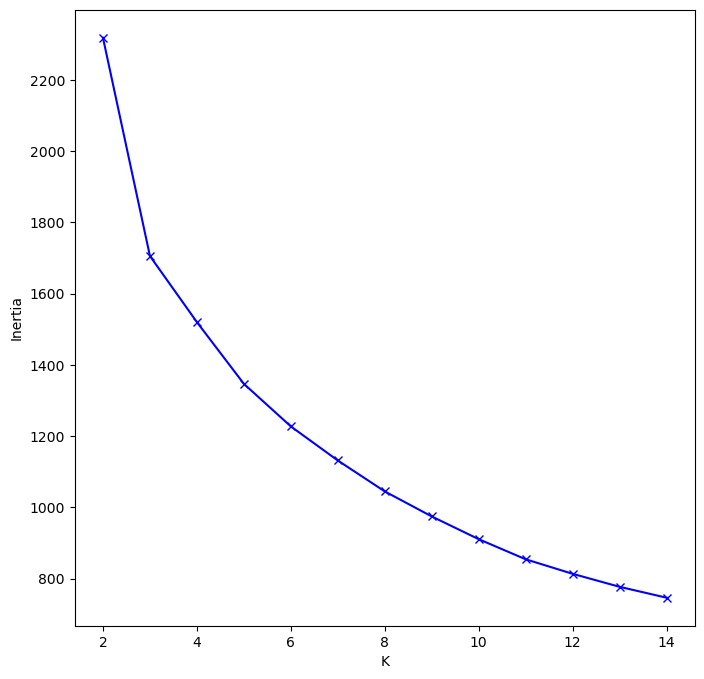

In [37]:
fig = plt.figure(figsize=(8,8))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()


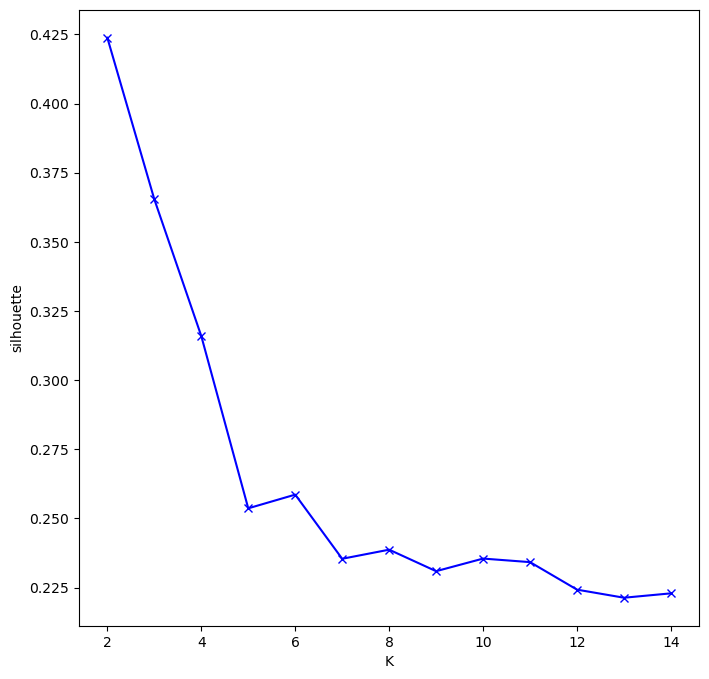

In [38]:
fig = plt.figure(figsize=(8,8))
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('K')
plt.ylabel('silhouette')
plt.show()


In [39]:
km = KMeans(n_clusters=3)
y = km.fit_predict(pca_df_scaler)
print(silhouette_score(pca_df_scaler,y))
df['Mk_resul'] = y

0.36540721141644816


In [40]:
df

Customer Key  Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
2           17341             50000                   7                  1   
3           40496             30000                   5                  1   
5           58634             20000                   3                  0   
7           37376             15000                   3                  0   
8           82490              5000                   2                  0   
..            ...               ...                 ...                ...   
607         90191             34000                   6                  3   
608         49341             47000                   4                  4   
609         11562             38000                   4                  3   
610         16253             39000                   7                  2   
611         80623             46000                   7                  4   

     Total_visits_online  Total_calls_made  Credit_Utilization_Ratio  \
2                      3                 4               7142.857143   
3                      1                 4               6000.000000   
5                      1                 8               6666.666667   
7                      1                 1               5000.000000   
8                      2                 2               2500.000000   
..                   ...               ...                       ...   
607                    1                 0               5666.666667   
608                    1                 0              11750.000000   
609                    2                 0               9500.000000   
610                    1                 0               5571.428571   
611                    1                 3               6571.428571   

     Interaction_Score  Mk_resul  
2                    8         2  
3                    6         0  
5                    9         1  
7                    2         0  
8                    4         0  
..                 ...       ...  
607                  4         0  
608                  5         2  
609                  5         2  
610                  3         0  
611                  8         2  

[608 rows x 9 columns]

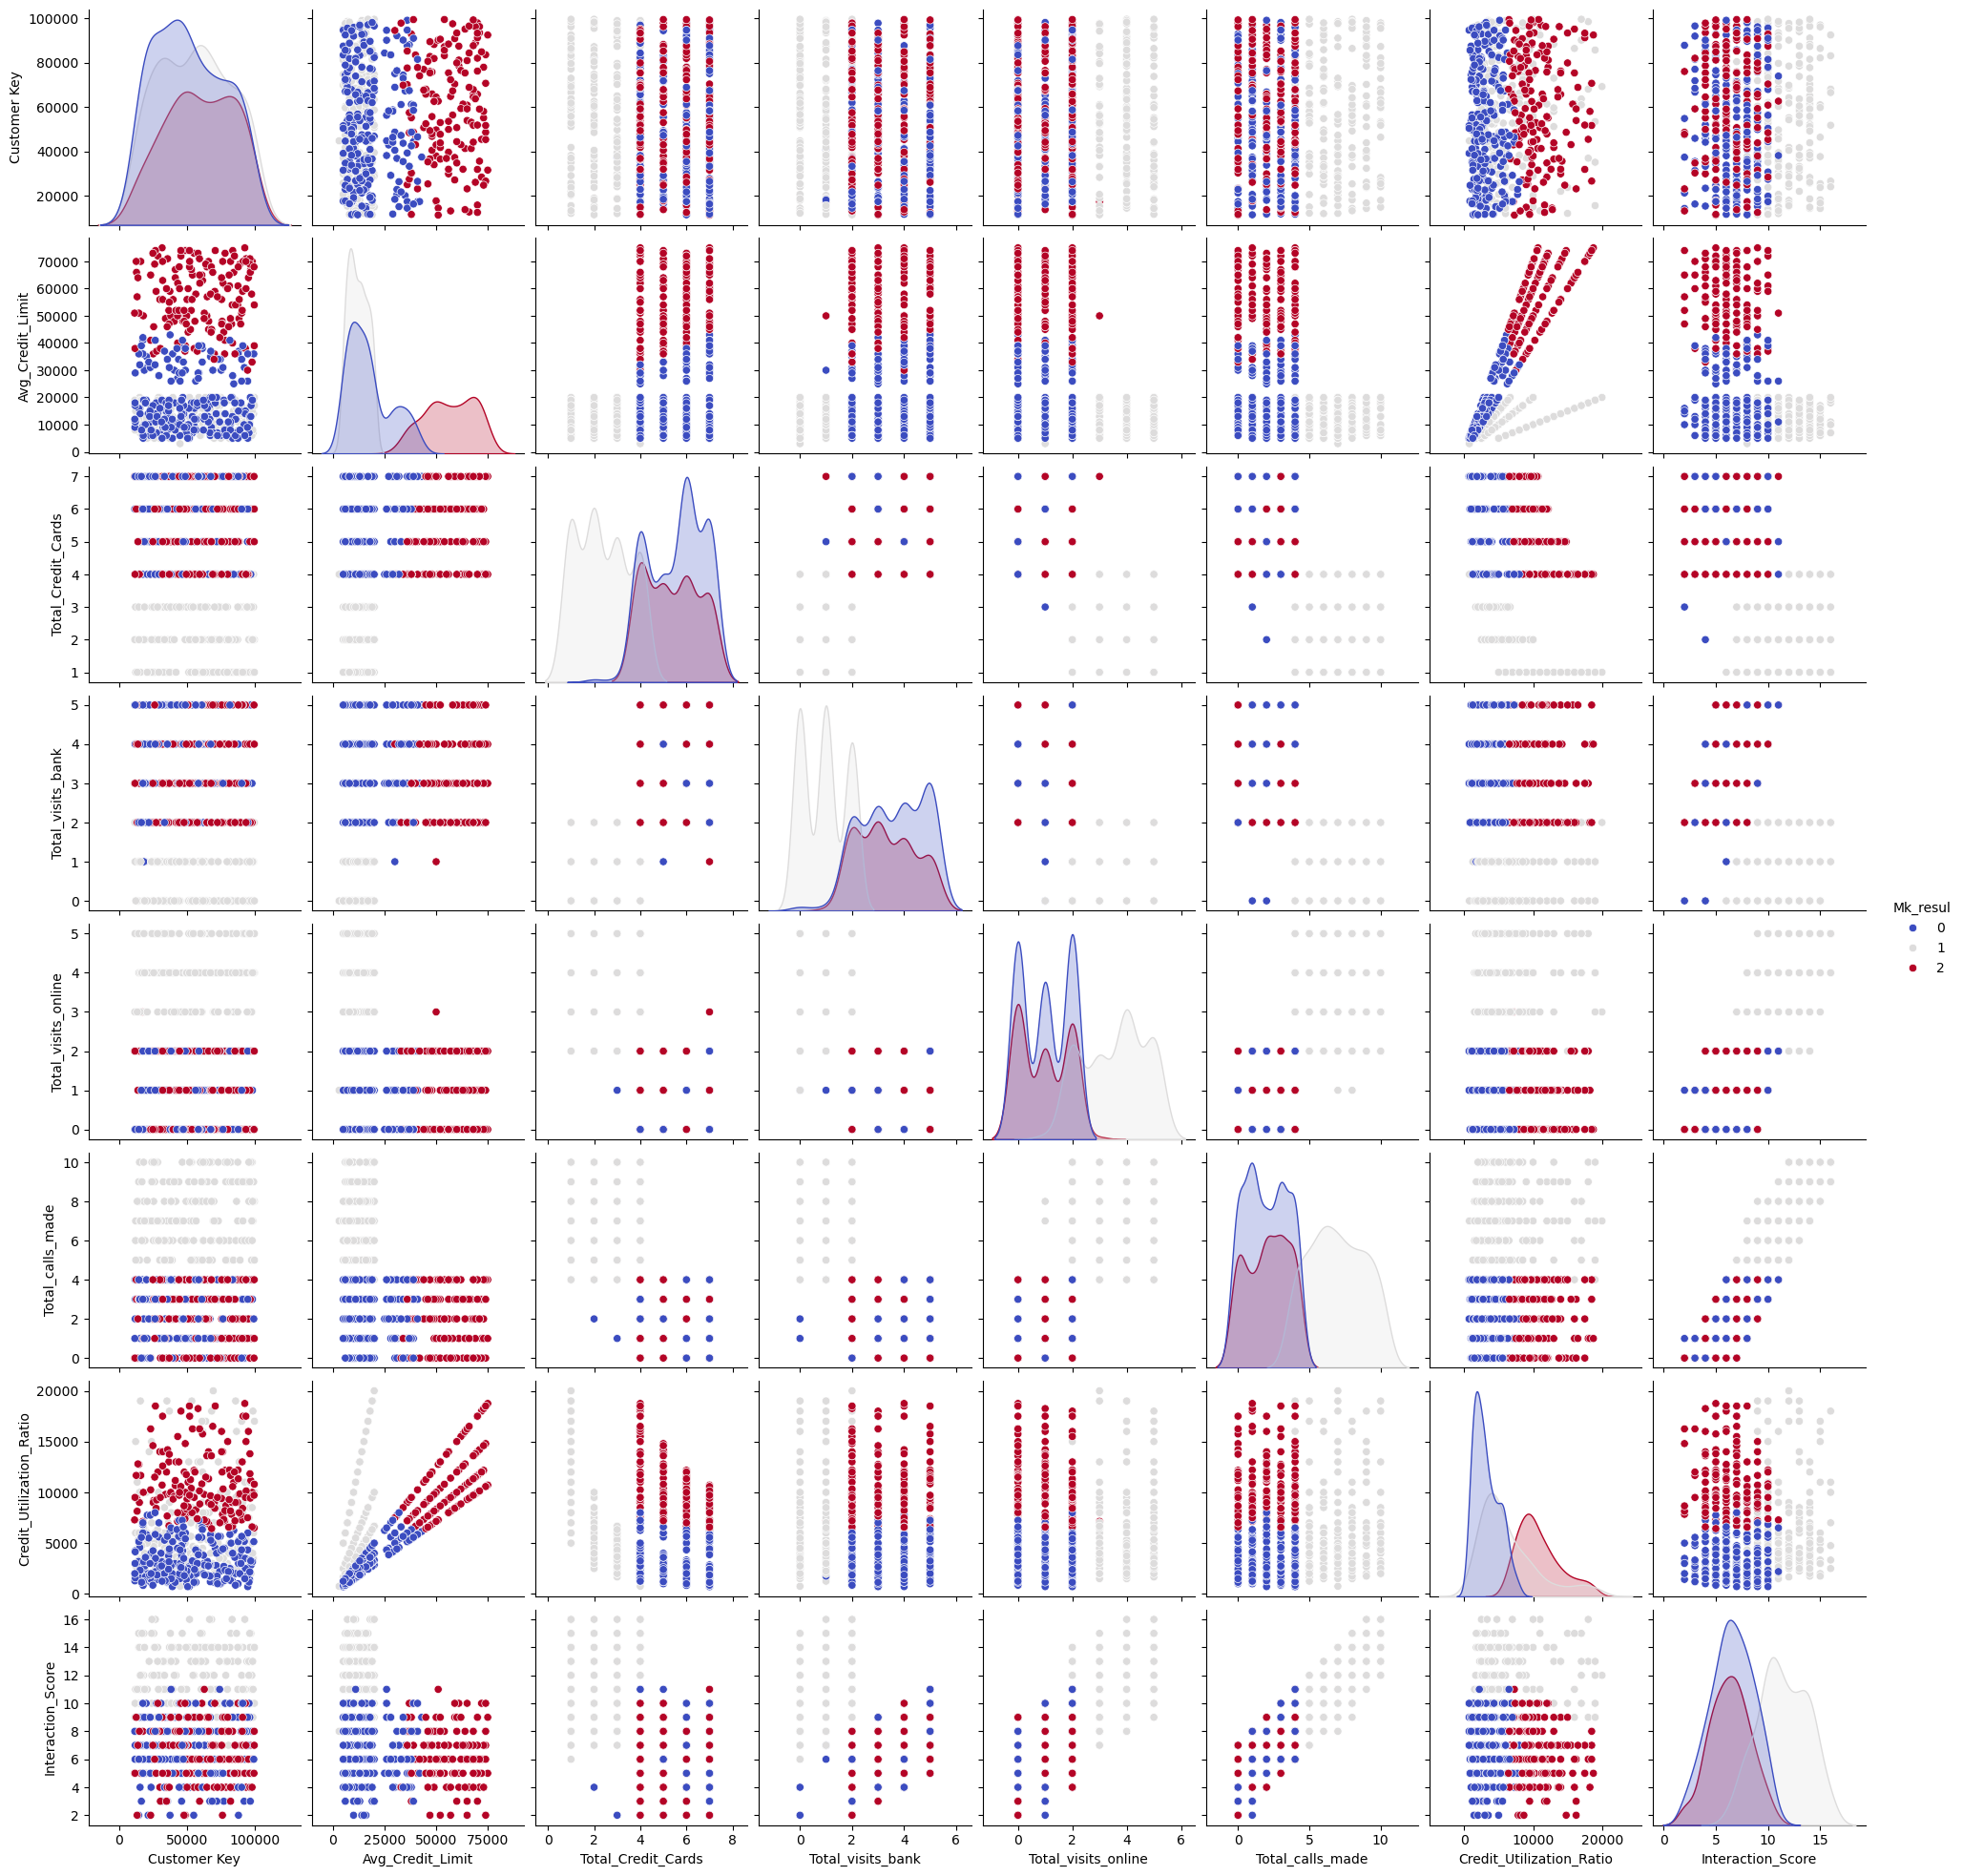

In [41]:
sns.pairplot(
    data= df,hue='Mk_resul',
    palette='coolwarm'
)

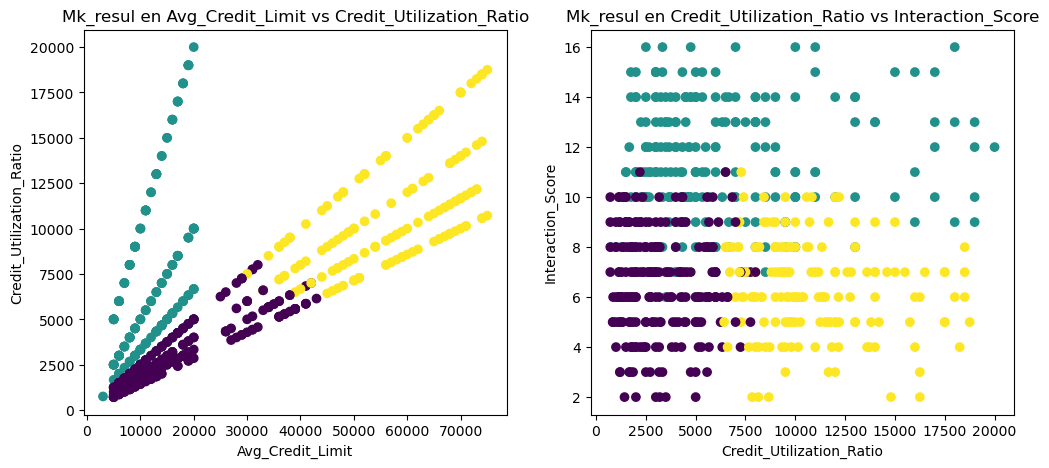

In [42]:

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(12, 5))  # figsize es opcional para ajustar el tamaño de la figura

# Primer gráfico de dispersión en el primer subplot (ax[0])
scatter1 = ax[0].scatter(x=df['Avg_Credit_Limit'], y=df['Credit_Utilization_Ratio'], c=df['Mk_resul'])
ax[0].set_title('Mk_resul en Avg_Credit_Limit vs Credit_Utilization_Ratio')
ax[0].set_xlabel('Avg_Credit_Limit')  # Etiqueta del eje X
ax[0].set_ylabel('Credit_Utilization_Ratio')  # Etiqueta del eje Y

# Segundo gráfico de dispersión en el segundo subplot (ax[1])
scatter2 = ax[1].scatter(x=df['Credit_Utilization_Ratio'], y=df['Interaction_Score'], c=df['Mk_resul'])
ax[1].set_title('Mk_resul en Credit_Utilization_Ratio vs Interaction_Score')
ax[1].set_xlabel('Credit_Utilization_Ratio')  # Etiqueta del eje X
ax[1].set_ylabel('Interaction_Score')  # Etiqueta del eje Y

plt.show()


In [43]:
df

Customer Key  Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
2           17341             50000                   7                  1   
3           40496             30000                   5                  1   
5           58634             20000                   3                  0   
7           37376             15000                   3                  0   
8           82490              5000                   2                  0   
..            ...               ...                 ...                ...   
607         90191             34000                   6                  3   
608         49341             47000                   4                  4   
609         11562             38000                   4                  3   
610         16253             39000                   7                  2   
611         80623             46000                   7                  4   

     Total_visits_online  Total_calls_made  Credit_Utilization_Ratio  \
2                      3                 4               7142.857143   
3                      1                 4               6000.000000   
5                      1                 8               6666.666667   
7                      1                 1               5000.000000   
8                      2                 2               2500.000000   
..                   ...               ...                       ...   
607                    1                 0               5666.666667   
608                    1                 0              11750.000000   
609                    2                 0               9500.000000   
610                    1                 0               5571.428571   
611                    1                 3               6571.428571   

     Interaction_Score  Mk_resul  
2                    8         2  
3                    6         0  
5                    9         1  
7                    2         0  
8                    4         0  
..                 ...       ...  
607                  4         0  
608                  5         2  
609                  5         2  
610                  3         0  
611                  8         2  

[608 rows x 9 columns]

In [44]:
df[df['Mk_resul']==1]

Customer Key  Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
5           58634             20000                   3                  0   
9           44770              3000                   4                  0   
10          52741             10000                   4                  0   
11          52326             13000                   3                  0   
12          92503             11000                   1                  2   
..            ...               ...                 ...                ...   
223         51773             20000                   2                  2   
224         96163             12000                   4                  1   
225         61234             16000                   4                  1   
226         55849              8000                   1                  2   
227         56156              8000                   2                  2   

     Total_visits_online  Total_calls_made  Credit_Utilization_Ratio  \
5                      1                 8               6666.666667   
9                      1                 7                750.000000   
10                     5                 5               2500.000000   
11                     2                 7               4333.333333   
12                     5                 9              11000.000000   
..                   ...               ...                       ...   
223                    4                10              10000.000000   
224                    5                 9               3000.000000   
225                    2                 5               4000.000000   
226                    4                 8               8000.000000   
227                    3                 8               4000.000000   

     Interaction_Score  Mk_resul  
5                    9         1  
9                    8         1  
10                  10         1  
11                   9         1  
12                  16         1  
..                 ...       ...  
223                 16         1  
224                 15         1  
225                  8         1  
226                 14         1  
227                 13         1  

[219 rows x 9 columns]

In [45]:
df[df['Mk_resul']==0]

Customer Key  Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
3           40496             30000                   5                  1   
7           37376             15000                   3                  0   
8           82490              5000                   2                  0   
113         18086              7000                   4                  1   
228         54838             10000                   7                  2   
..            ...               ...                 ...                ...   
601         47198             33000                   5                  4   
602         67415             37000                   7                  4   
604         58276             27000                   7                  3   
607         90191             34000                   6                  3   
610         16253             39000                   7                  2   

     Total_visits_online  Total_calls_made  Credit_Utilization_Ratio  \
3                      1                 4               6000.000000   
7                      1                 1               5000.000000   
8                      2                 2               2500.000000   
113                    2                 4               1750.000000   
228                    0                 0               1428.571429   
..                   ...               ...                       ...   
601                    0                 2               6600.000000   
602                    0                 1               5285.714286   
604                    0                 2               3857.142857   
607                    1                 0               5666.666667   
610                    1                 0               5571.428571   

     Interaction_Score  Mk_resul  
3                    6         0  
7                    2         0  
8                    4         0  
113                  7         0  
228                  2         0  
..                 ...       ...  
601                  6         0  
602                  5         0  
604                  5         0  
607                  4         0  
610                  3         0  

[232 rows x 9 columns]

## hierarchical clustering

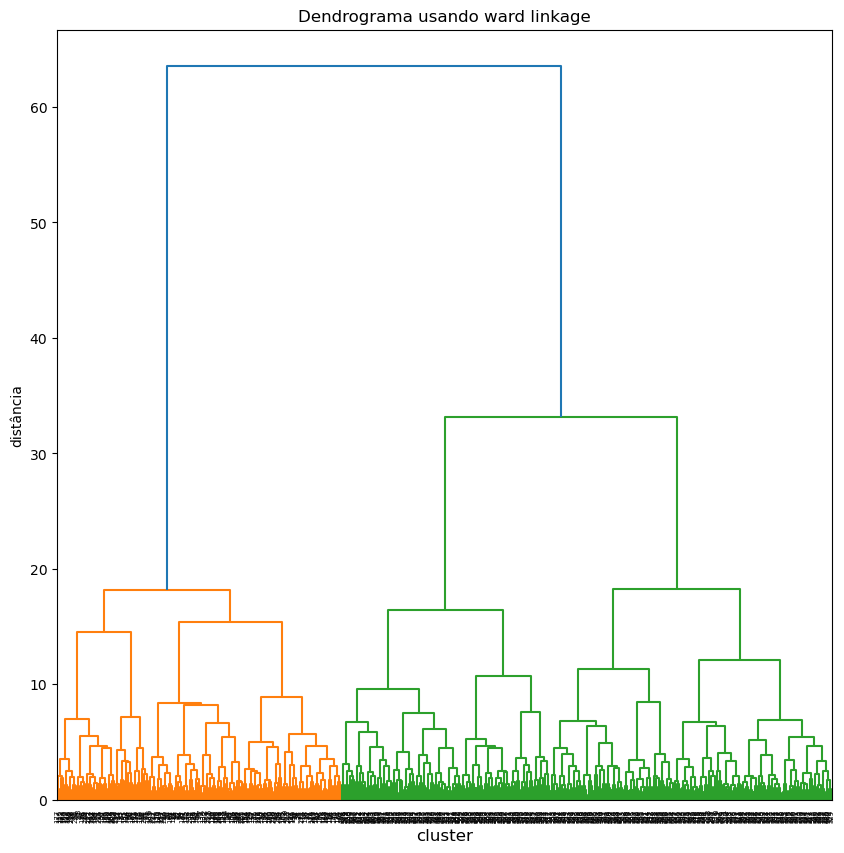

In [46]:
fig = plt.figure(figsize=(10,10))
dendrogram_plot = dendrogram(linkage(pca_data_scaler, method='ward'))

plt.title('Dendrograma usando ward linkage')
plt.xlabel('cluster', fontsize =12)
plt.ylabel('distância', fontsize=10)
plt.show()

*Aqui visualizamos que la mejor forma de aplicar de dividr la data en clustere seria en 3 cluster de clientes*

In [47]:
hc = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
y_hc = hc.fit_predict(pca_df_scaler)

In [48]:
df['hc_cluster'] = y_hc

In [49]:
df

Customer Key  Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
2           17341             50000                   7                  1   
3           40496             30000                   5                  1   
5           58634             20000                   3                  0   
7           37376             15000                   3                  0   
8           82490              5000                   2                  0   
..            ...               ...                 ...                ...   
607         90191             34000                   6                  3   
608         49341             47000                   4                  4   
609         11562             38000                   4                  3   
610         16253             39000                   7                  2   
611         80623             46000                   7                  4   

     Total_visits_online  Total_calls_made  Credit_Utilization_Ratio  \
2                      3                 4               7142.857143   
3                      1                 4               6000.000000   
5                      1                 8               6666.666667   
7                      1                 1               5000.000000   
8                      2                 2               2500.000000   
..                   ...               ...                       ...   
607                    1                 0               5666.666667   
608                    1                 0              11750.000000   
609                    2                 0               9500.000000   
610                    1                 0               5571.428571   
611                    1                 3               6571.428571   

     Interaction_Score  Mk_resul  hc_cluster  
2                    8         2           1  
3                    6         0           2  
5                    9         1           0  
7                    2         0           1  
8                    4         0           0  
..                 ...       ...         ...  
607                  4         0           1  
608                  5         2           2  
609                  5         2           2  
610                  3         0           2  
611                  8         2           2  

[608 rows x 10 columns]

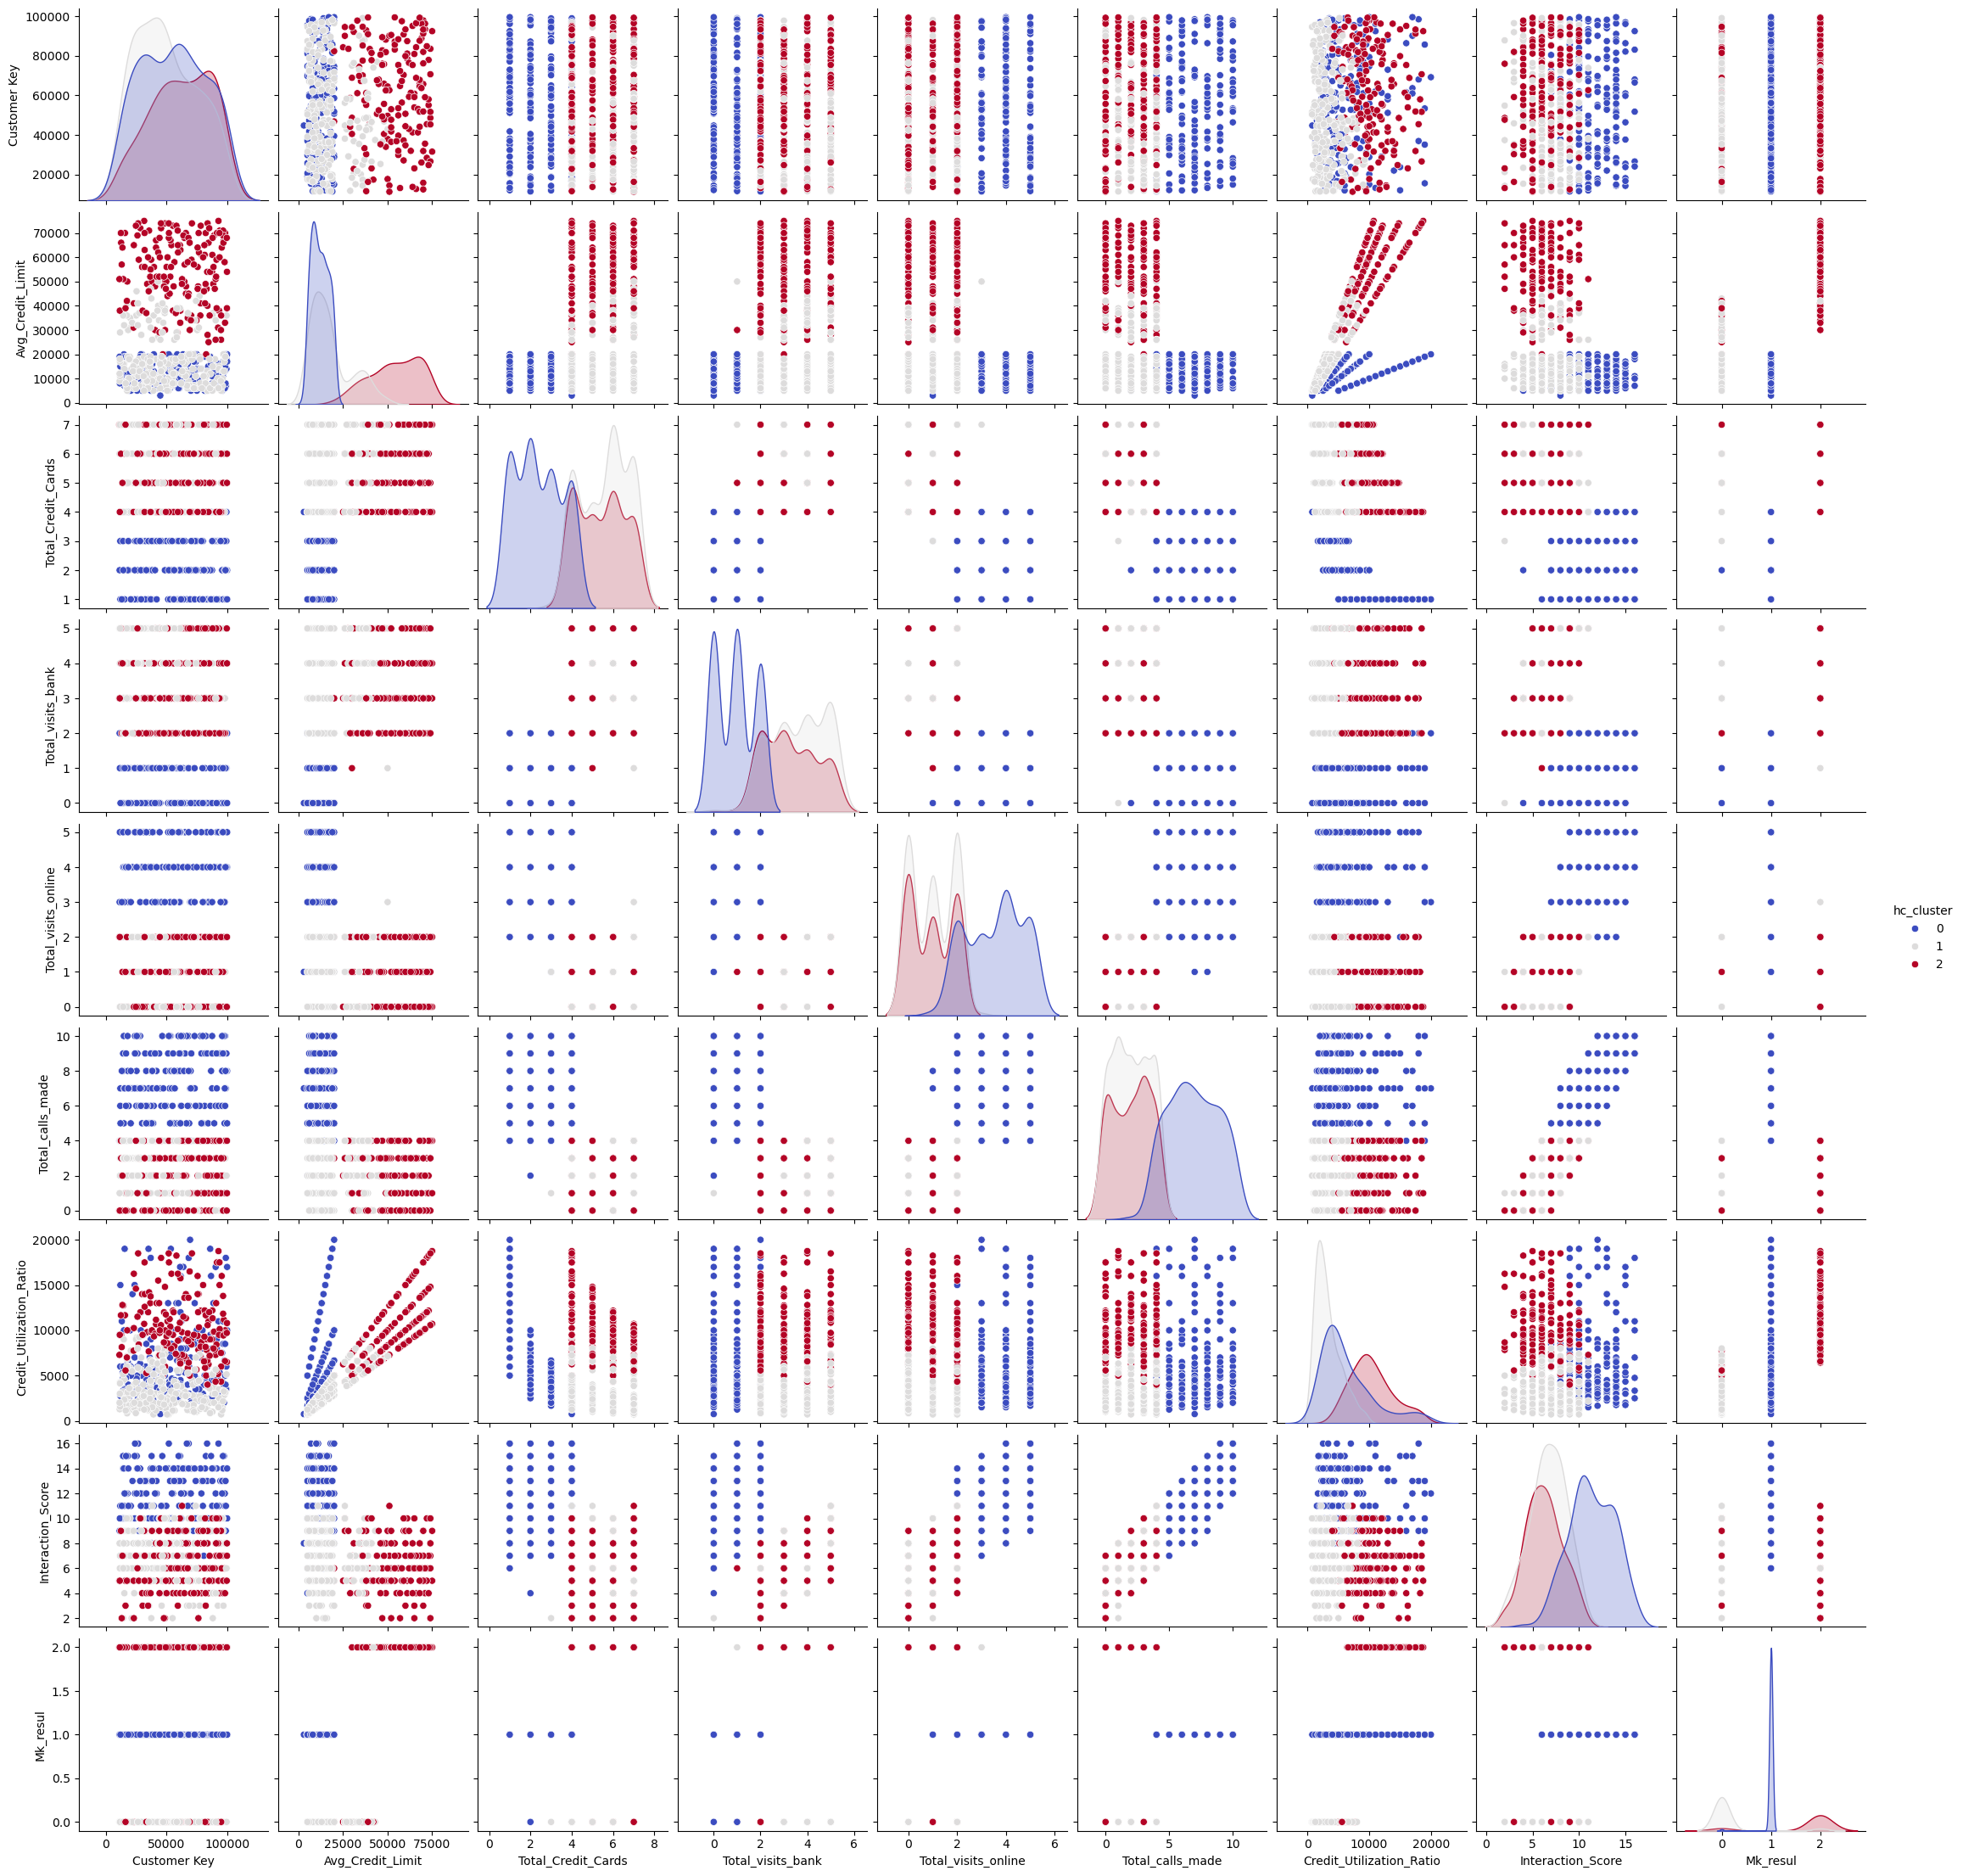

In [50]:
sns.pairplot(
    data= df,hue='hc_cluster',
    palette='coolwarm'
)

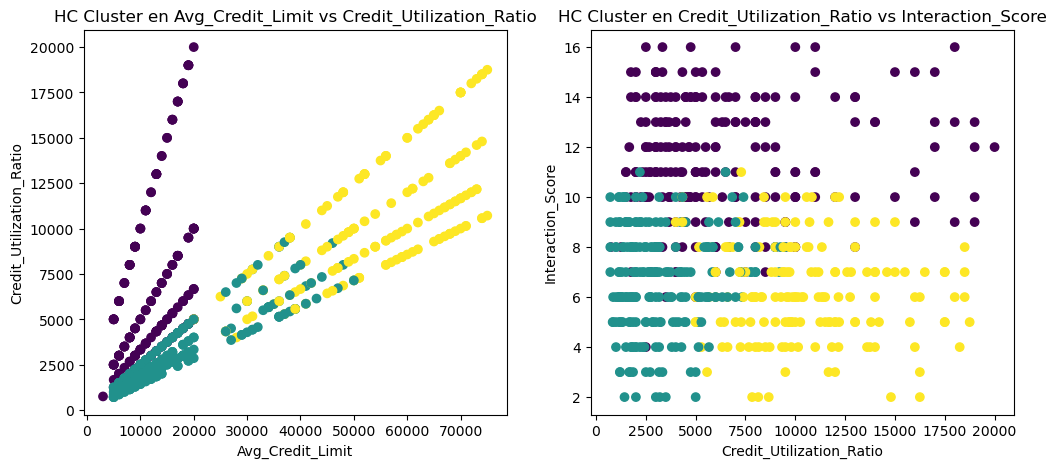

In [51]:

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(12, 5))  # figsize es opcional para ajustar el tamaño de la figura

# Primer gráfico de dispersión en el primer subplot (ax[0])
scatter1 = ax[0].scatter(x=df['Avg_Credit_Limit'], y=df['Credit_Utilization_Ratio'], c=df['hc_cluster'])
ax[0].set_title('HC Cluster en Avg_Credit_Limit vs Credit_Utilization_Ratio')
ax[0].set_xlabel('Avg_Credit_Limit')  # Etiqueta del eje X
ax[0].set_ylabel('Credit_Utilization_Ratio')  # Etiqueta del eje Y

# Segundo gráfico de dispersión en el segundo subplot (ax[1])
scatter2 = ax[1].scatter(x=df['Credit_Utilization_Ratio'], y=df['Interaction_Score'], c=df['hc_cluster'])
ax[1].set_title('HC Cluster en Credit_Utilization_Ratio vs Interaction_Score')
ax[1].set_xlabel('Credit_Utilization_Ratio')  # Etiqueta del eje X
ax[1].set_ylabel('Interaction_Score')  # Etiqueta del eje Y

plt.show()


## Evaluando el modelo HC

In [52]:
silhouette_score(pca_df_scaler,y_hc)

0.3443674785632165

## DBSCAN

In [113]:
dbsacan_cluster = DBSCAN(eps= 0.9, min_samples=6)
y_m_predict = dbsacan_cluster.fit_predict(pca_df_scaler)
df['DBSCAN_resul'] = y_m_predict
print("DBSCAN Clustering Completed")

DBSCAN Clustering Completed


In [102]:
y_m_predict[:10]

array([ 0,  0,  1, -1, -1,  1,  1,  1, -1,  1])

<Axes: xlabel='Avg_Credit_Limit', ylabel='Credit_Utilization_Ratio'>

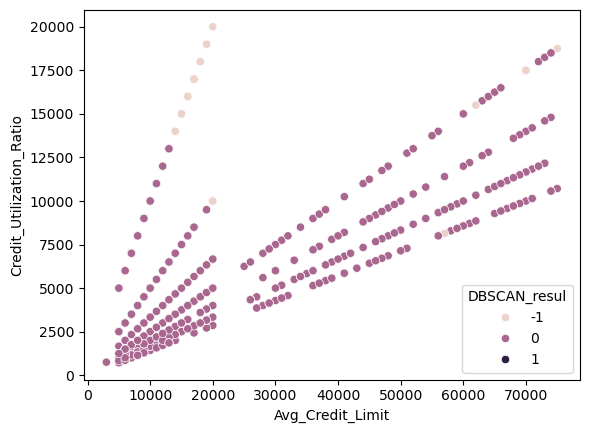

In [111]:
sns.scatterplot(df,x=df['Avg_Credit_Limit'],y=df['Credit_Utilization_Ratio'],hue=df['DBSCAN_resul'])

<Axes: xlabel='Avg_Credit_Limit', ylabel='Interaction_Score'>

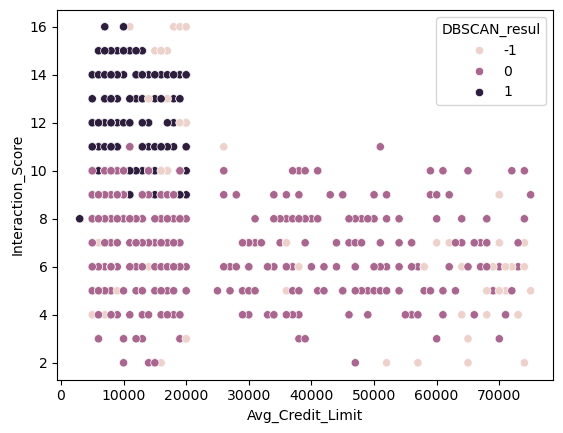

In [108]:
sns.scatterplot(df,x=df['Avg_Credit_Limit'],y=df['Interaction_Score'],hue=df['DBSCAN_resul'])

In [57]:
pca_df_scaler

0         1         2         3
0   -0.267337  0.357598  1.598892 -0.125490
1   -0.363448 -0.062650  0.624419  0.966723
2    1.506173  0.346211 -0.044679  0.946146
3   -0.490056 -0.506687  0.772822  2.812469
4    0.600632 -0.658322 -1.088945  2.620338
..        ...       ...       ...       ...
603 -2.036874  0.029515 -1.340956  0.750851
604 -1.913147  1.258987  0.528427  0.242912
605 -1.243089  0.408690  1.886223  0.567244
606 -2.218464 -0.508432  1.530688  0.982734
607 -1.641488  0.377864 -0.996094 -0.944020

[608 rows x 4 columns]

## Hiperparameter


In [58]:
from sklearn.neighbors import NearestNeighbors

In [59]:
neighboors = NearestNeighbors(n_neighbors=8)
neighboors_fit = neighboors.fit(pca_df_scaler)
distances, indices = neighboors_fit.kneighbors(pca_df_scaler)

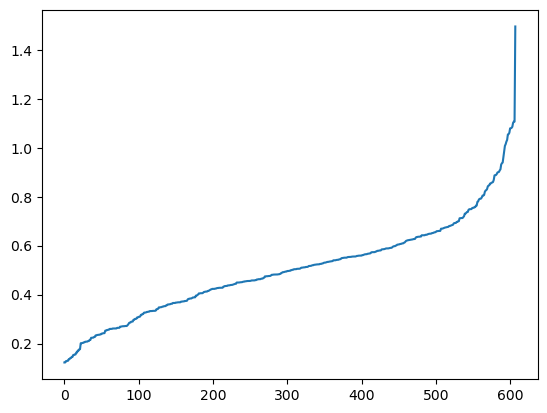

In [60]:
distances=np.sort(distances,axis=0)
distances = distances[:,1]
plt.plot(distances)

In [73]:
eps_values = np.arange(0.6,1.0,0.10)
min_samples = np.arange(3,10)

In [62]:
from itertools import  product

In [78]:
# dbscan_parameter =list(product(eps_values,min_samples))

# silhouette_score_db = []

# for p in dbscan_parameter:
#     y = DBSCAN(eps=p[0],min_samples=p[1]).fit(pca_df_scaler)
#     silhouette_score_db.append(silhouette_score(pca_df_scaler,y_m_predict))

In [74]:
# from sklearn.cluster import DBSCAN
# from sklearn.metrics import silhouette_score
# import numpy as np
# from itertools import product

# # Suponiendo que pca_df_scaler es tu conjunto de datos escalado
# eps_values = np.arange(0.1, 1.0, 0.1)
# min_samples = np.arange(3, 11)

# dbscan_parameter_list = list(product(eps_values, min_samples))

# for eps, min_samp in dbscan_parameter_list:
#     dbscan = DBSCAN(eps=eps, min_samples=min_samp).fit(pca_df_scaler)
#     core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
#     core_samples_mask[dbscan.core_sample_indices_] = True
#     labels = dbscan.labels_
    
#     # Número de clusters en labels, ignorando ruido si está presente.
#     n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    
#     print(f"EPS: {eps}, MinSamples: {min_samp}, Clusters encontrados: {n_clusters_}")

#     # Calcula el score de silueta solo si hay más de 1 cluster encontrado
#     if n_clusters_ > 1:
#         silhouette_avg = silhouette_score(pca_df_scaler, labels)
#         print("Silhouette Coefficient: %0.3f" % silhouette_avg)


EPS: 0.1, MinSamples: 3, Clusters encontrados: 0
EPS: 0.1, MinSamples: 4, Clusters encontrados: 0
EPS: 0.1, MinSamples: 5, Clusters encontrados: 0
EPS: 0.1, MinSamples: 6, Clusters encontrados: 0
EPS: 0.1, MinSamples: 7, Clusters encontrados: 0
EPS: 0.1, MinSamples: 8, Clusters encontrados: 0
EPS: 0.1, MinSamples: 9, Clusters encontrados: 0
EPS: 0.1, MinSamples: 10, Clusters encontrados: 0
EPS: 0.2, MinSamples: 3, Clusters encontrados: 0
EPS: 0.2, MinSamples: 4, Clusters encontrados: 0
EPS: 0.2, MinSamples: 5, Clusters encontrados: 0
EPS: 0.2, MinSamples: 6, Clusters encontrados: 0
EPS: 0.2, MinSamples: 7, Clusters encontrados: 0
EPS: 0.2, MinSamples: 8, Clusters encontrados: 0
EPS: 0.2, MinSamples: 9, Clusters encontrados: 0
EPS: 0.2, MinSamples: 10, Clusters encontrados: 0
EPS: 0.30000000000000004, MinSamples: 3, Clusters encontrados: 6
Silhouette Coefficient: -0.516
EPS: 0.30000000000000004, MinSamples: 4, Clusters encontrados: 0
EPS: 0.30000000000000004, MinSamples: 5, Clusters enc

In [93]:
dbscan_paramns = list(product(eps_values,min_samples))
sil_scores = []
labels = 0

for p in dbscan_paramns: 
    y_pred = DBSCAN(eps= p[0], min_samples=p[1]).fit_predict(pca_df_scaler),
    y_pred = np.array(y_pred).ravel()
    if len(np.unique(y_pred)) < 2:
        print(f'Parameters: {p[0]} and {p[1]}')
        
    else:
        sil_scores.append(silhouette_score(pca_df_scaler,y_pred))

Parameters: 0.1 and 3
Parameters: 0.1 and 4
Parameters: 0.1 and 5
Parameters: 0.1 and 6
Parameters: 0.1 and 7
Parameters: 0.1 and 8
Parameters: 0.1 and 9
Parameters: 0.1 and 10
Parameters: 0.2 and 3
Parameters: 0.2 and 4
Parameters: 0.2 and 5
Parameters: 0.2 and 6
Parameters: 0.2 and 7
Parameters: 0.2 and 8
Parameters: 0.2 and 9
Parameters: 0.2 and 10
Parameters: 0.30000000000000004 and 4
Parameters: 0.30000000000000004 and 5
Parameters: 0.30000000000000004 and 6
Parameters: 0.30000000000000004 and 7
Parameters: 0.30000000000000004 and 8
Parameters: 0.30000000000000004 and 9
Parameters: 0.30000000000000004 and 10
Parameters: 0.4 and 6
Parameters: 0.4 and 7
Parameters: 0.4 and 8
Parameters: 0.4 and 9
Parameters: 0.4 and 10
Parameters: 0.5 and 8
Parameters: 0.5 and 9
Parameters: 0.5 and 10


In [98]:
def find_optimal_parameters(df, eps_range, min_samples_range):
    X = df.values

    best_score = -1
    best_eps = None
    best_min_samples = None

    for eps in eps_range:
        for min_samples in min_samples_range:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            labels = dbscan.fit_predict(X)
            num_clusters = len(set(labels)) - (1 if -1 in labels else 0)  # Number of clusters ignoring noise (-1)

            if num_clusters > 1:  # Calculate silhouette score only if there are multiple clusters
                score = silhouette_score(X, labels)
                if score > best_score:
                    best_score = score
                    best_eps = eps
                    best_min_samples = min_samples

    return best_eps, best_min_samples

In [100]:
best_eps, best_min_samples = find_optimal_parameters(pca_df_scaler, eps_values, min_samples)

print("Best epsilon:", best_eps)
print("Best min_samples:", best_min_samples)

Best epsilon: 0.9
Best min_samples: 6


In [2]:
# df_paramets =pd.DataFrame.from_records(pca_df_scaler,columns=['eps','min_samples'])
# df_paramets['sil_score'] = silhouette_score_db

In [97]:
sil_scores

[-0.516480661355446,
 -0.4752570898386124,
 -0.2892117761565986,
 -0.27203106876681954,
 -0.33701622447549423,
 -0.4160357289568689,
 -0.42304861982569225,
 -0.3484497071844201,
 -0.36276042096841077,
 -0.20644394122692122,
 -0.22793955467428617,
 -0.3019805990959087,
 -0.3514754120903569,
 -0.18265886180967658,
 -0.2774373989525342,
 -0.31829518545157864,
 -0.337549736053049,
 -0.13787313028485002,
 -0.04571802605937129,
 -0.11545207272244984,
 -0.15315985236893545,
 -0.22127129607003826,
 -0.23389841036669545,
 -0.23671443693327945,
 -0.13340124222863664,
 -0.026979744319852225,
 0.20891267200062105,
 0.06063367681768437,
 0.244957300357629,
 0.21393546142649966,
 -0.02146016397647926,
 -0.14254769012692053,
 -0.11070929703628198,
 -0.019417478323947163,
 0.07866414903650318,
 0.23161212753887833,
 0.3126166380959121,
 0.3040833137580989,
 0.28805961009084957,
 0.2657487565979048,
 0.24634248402833583]

In [1]:
# df_paramets['sil_score'] = sil_scores

In [86]:
df_paramets

eps  min_samples
0   0.6            2
1   0.6            3
2   0.6            4
3   0.6            5
4   0.6            6
5   0.6            7
6   0.6            8
7   0.6            9
8   0.7            2
9   0.7            3
10  0.7            4
11  0.7            5
12  0.7            6
13  0.7            7
14  0.7            8
15  0.7            9
16  0.8            2
17  0.8            3
18  0.8            4
19  0.8            5
20  0.8            6
21  0.8            7
22  0.8            8
23  0.8            9
24  0.9            2
25  0.9            3
26  0.9            4
27  0.9            5
28  0.9            6
29  0.9            7
30  0.9            8
31  0.9            9

In [115]:
# pivot_data=pd.pivot_table(df_paramets,values='sil_score',index='min_samples',columns='eps')

<Axes: xlabel='eps', ylabel='min_samples'>

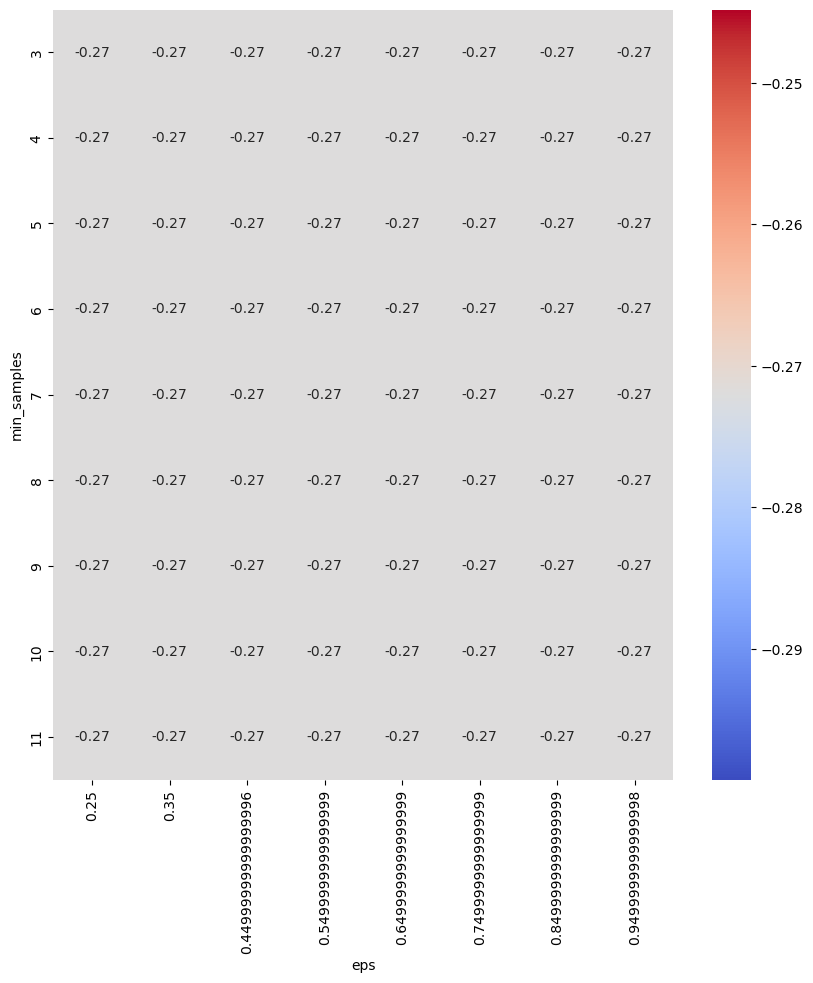

In [ ]:
fig, ax =plt.subplots(figsize = (10,10))
sns.heatmap(pivot_data, annot=True, annot_kws={'size':10},cmap='coolwarm',ax =ax)

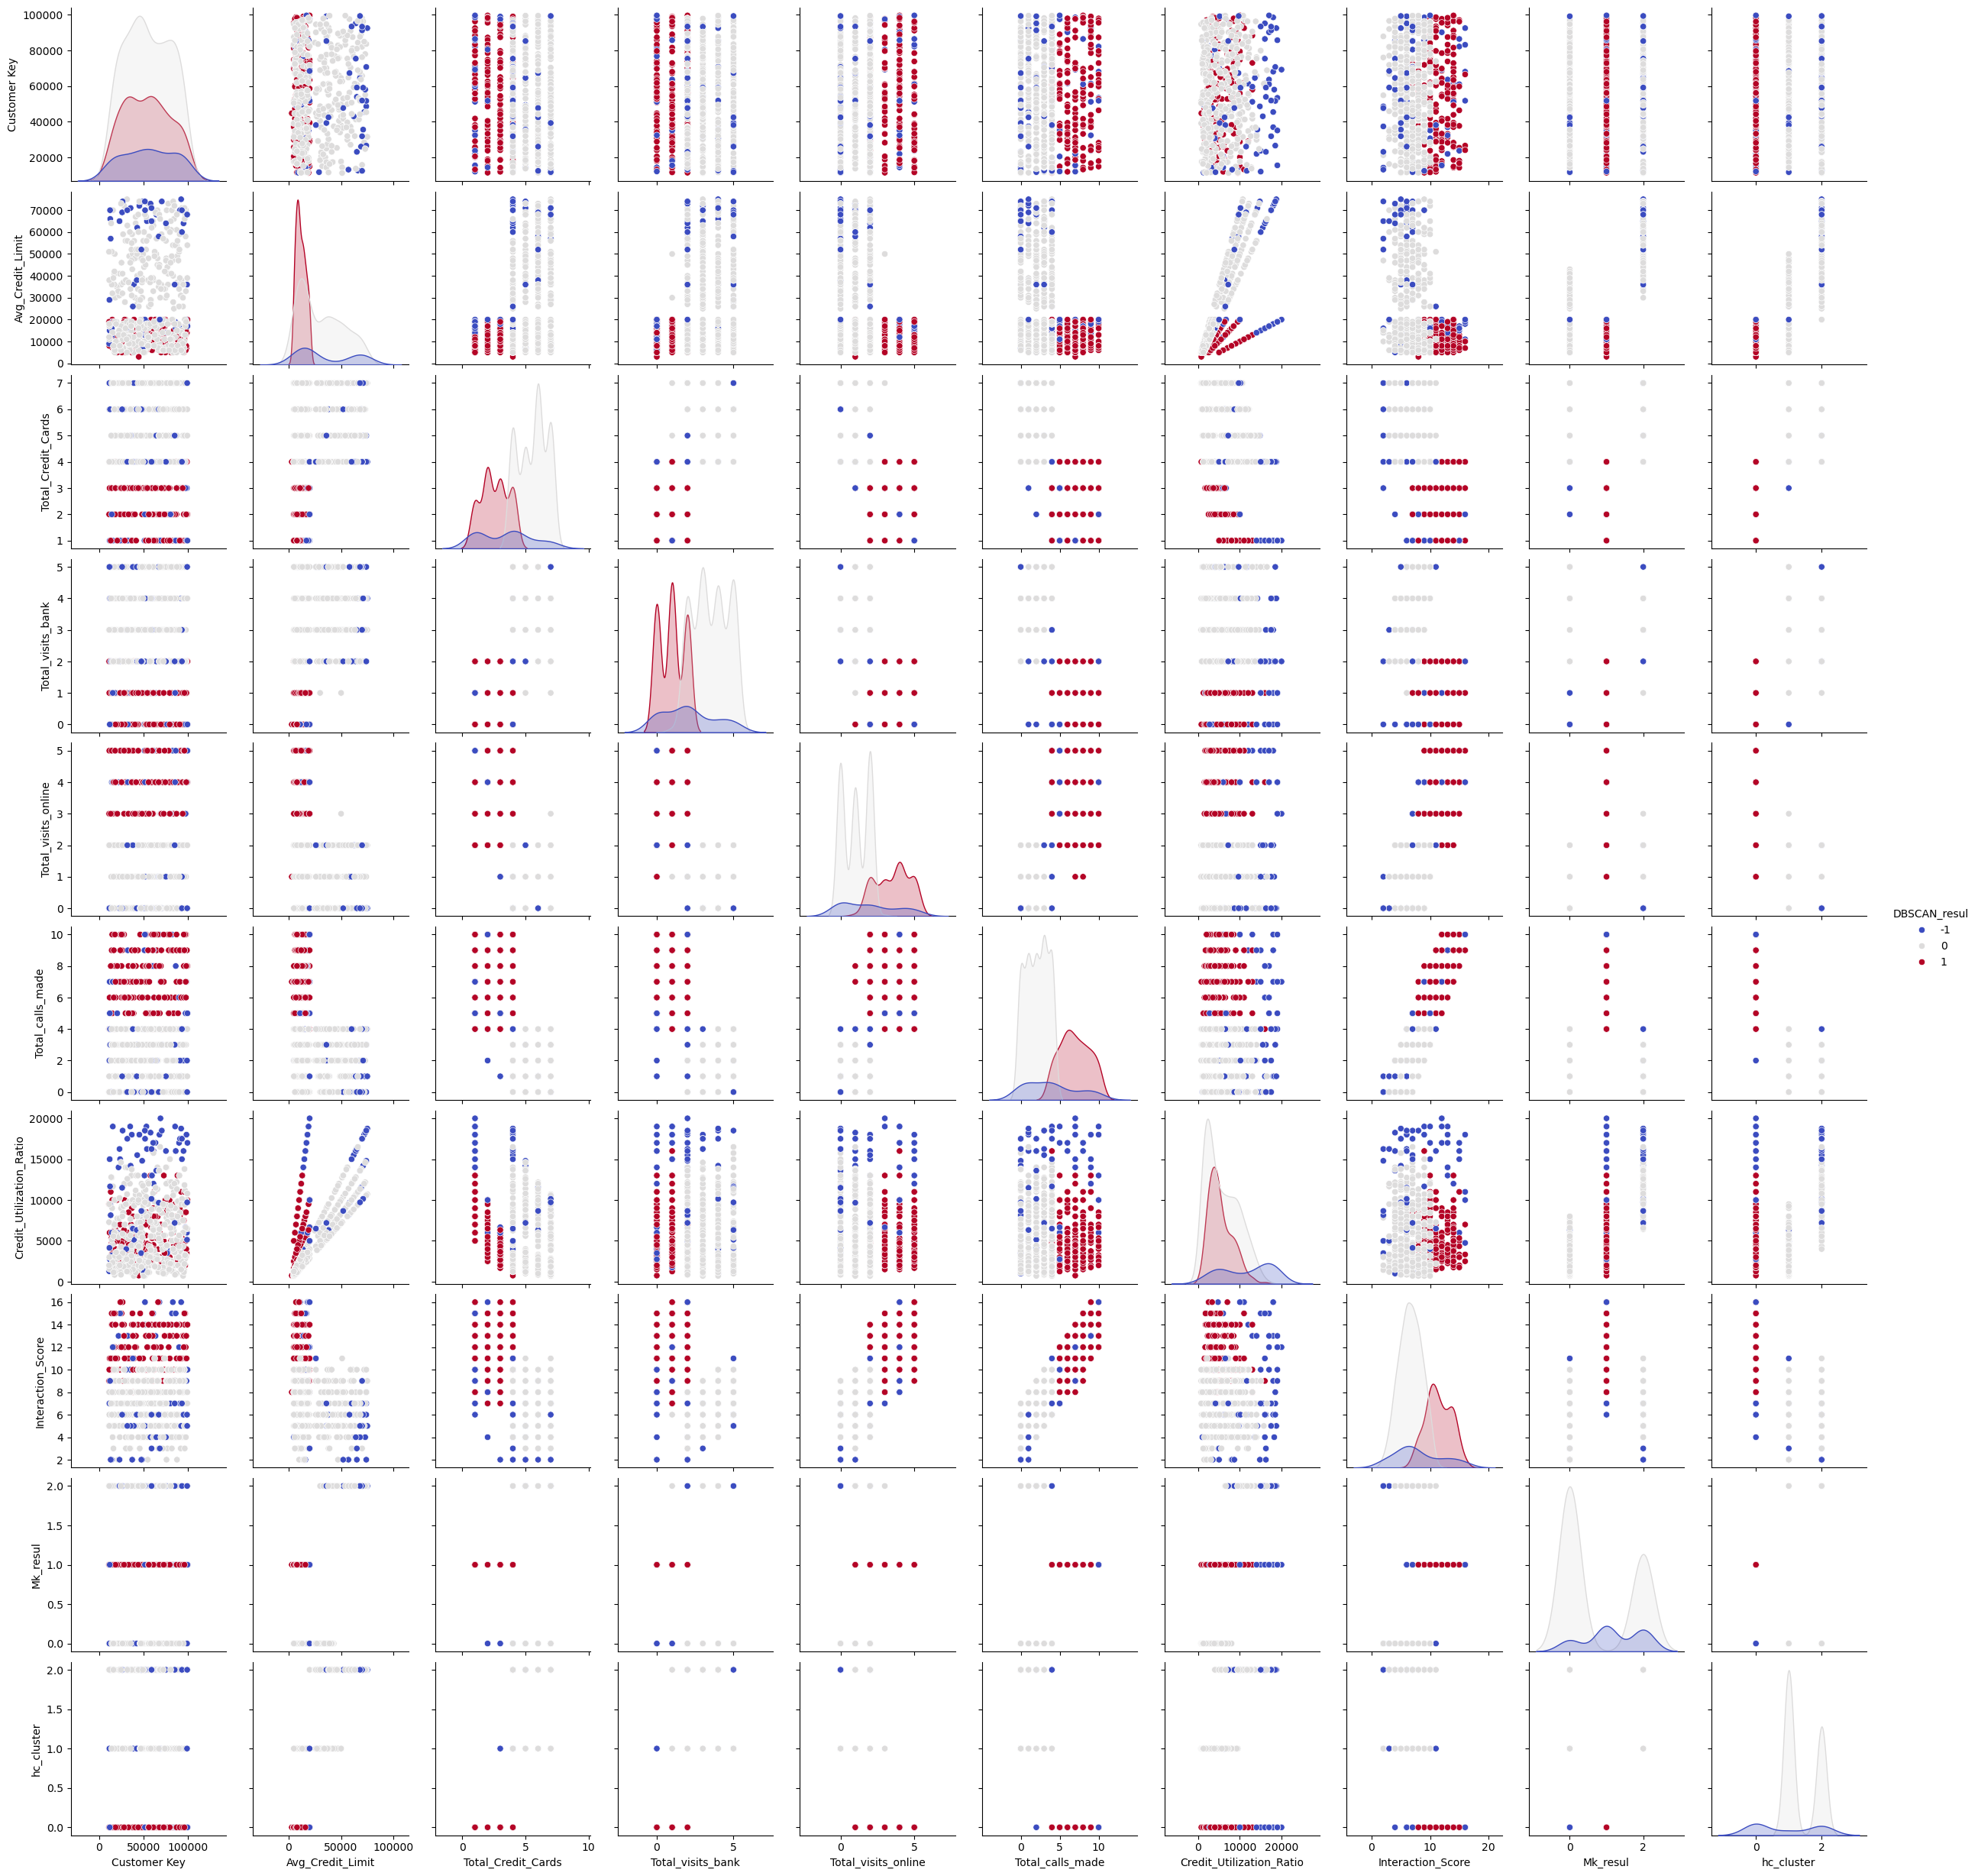

In [114]:
sns.pairplot(
    data= df,hue='DBSCAN_resul',
    palette='coolwarm'
)